# Build efficient, high-speed programs using the high performance NumPy mathematics library
## Ivan Idris


## Contents

1. NumPy Quick Start


## Chapter Four: Convenience Functions for Your Convenience

The folowing topics are coverd in this Chapter
1. Data selection and extraction
2. Sample data analysis
3. Examples of correlation of returns
4. Lnear algebra

### Correlation

In [91]:
# Imports for chapter one
import numpy as np
import matplotlib.pyplot as plt

In [130]:
def crossCorrelation(seriesOne, seriesTwo):
    """
    The function takes  two series, and calculates cross-correlation at lags ranging from one to half of the length of the sereis.

    Notice that the unit of lag is the same as the duration between two observations.

    arg
        seriesTwo: The NumPy array whose crosscorrelation has to be calculated.

        seriesOne: The NumPy array whose crosscorrelation has to be calculated.

    rtn: A NumPy array containing crosscorrelations at different lags. Thefirst colum corresponds to positive lags, and the second is for negative lags

    """
    crossCorrelation = np.array([]).reshape(-1,2)
    for lag in range(seriesOne.shape[0]//2):
        crossCorrelation = np.vstack((crossCorrelation
                                        , np.array([np.corrcoef(seriesOne[lag+1:], seriesTwo[:-lag-1])[0,1], np.corrcoef(seriesOne[:-lag-1], seriesTwo[lag+1:])[0,1]])))

    return crossCorrelation

In [206]:
(dateNtpc
, prevCloseNtpc
, openNtpc
, highNtpc
, lowNtpc
, closeNtpc
, vwapNtpc
, volumeNtpc) = np.loadtxt("../resources/data/stocksData/NTPC.csv"
                  , usecols=(0, 3, 4, 5, 6, 8, 9, 10)
                  , delimiter=","
                  , unpack = True
                  , skiprows = 1
                  , dtype = np.dtype("datetime64[s],f8,f8,f8,f8,f8,f8,f8")
                  , converters = {0 : lambda x: x.decode("utf-8")})

(dateCil
, prevCloseCil
, openCil
, highCil
, lowCil
, closeCil
, vwapCil
, volumeCil) = np.loadtxt("../resources/data/stocksData/COALINDIA.csv"
                  , usecols=(0, 3, 4, 5, 6, 8, 9, 10)
                  , delimiter=","
                  , unpack = True
                  , skiprows = 1
                  , dtype = np.dtype("datetime64[s],f8,f8,f8,f8,f8,f8,f8")
                  , converters = {0 : lambda x: x.decode("utf-8")})

minDateNtpcCil = max(np.min(dateNtpc), np.min(dateCil))
maxDateNtpcCil = min(np.max(dateNtpc), np.max(dateCil))
closeNtpc = closeNtpc[np.where((dateNtpc >=  minDateNtpcCil) & (dateNtpc <= maxDateNtpcCil))]
closeCil = closeCil[np.where((dateCil >=  minDateNtpcCil) & (dateCil <= maxDateNtpcCil))]

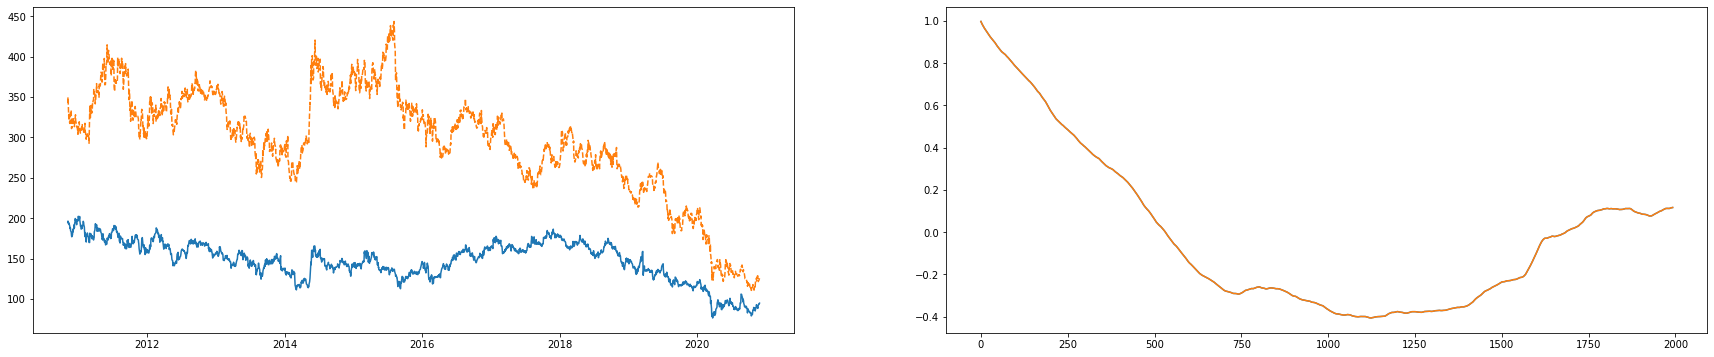

(2496,) (2496,)


In [207]:
# Finding the returns
returnsNtpc = np.diff(closeNtpc)/closeNtpc[:-1]
returnaCil = np.diff(closeCil)/closeCil[:-1]

#Difference
difference = closeNtpc - closeCil

plt.figure(figsize=(30, 6))
plt.subplot(121)
plt.plot(dateCil, closeNtpc, "-")
plt.plot(dateCil, closeCil, "--")
corrleationCloseNtpcCil = np.vstack((np.array([np.corrcoef(closeNtpc, closeCil)[0,1]
                                               , np.corrcoef(closeNtpc, closeCil)[0,1]])
                                     , crossCorrelation(closeNtpc, closeCil)))
plt.subplot(122)
plt.plot(corrleationCloseNtpc)
plt.show()
print(closeNtpc.shape, closeCil.shape)

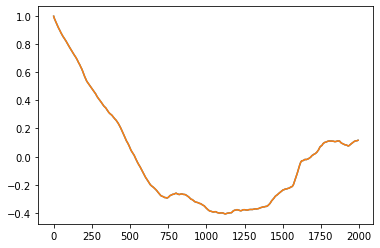

(2496,) (2496,)


In [186]:
closeNtpc.shape, closeCil.shape

((2496,), (2496,))

In [182]:
closeNtpc = closeNtpc[np.where(dateNtpc >= np.min(dateCil))]

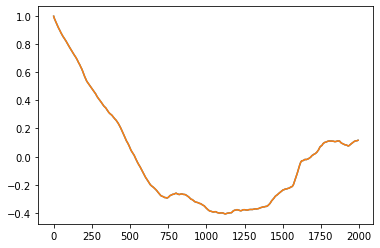

In [128]:
corrleationCloseNtpc = crossCorrelation(closeNtpc, closeNtpc)
plt.plot(corrleationCloseNtpc)
plt.show()

In [89]:
delta[delta > np.exp(-18)]

array([], dtype=float64)

In [84]:
cutoff = np.exp(-5)

In [32]:
np.vstack?

Signature: np.vstack(tup)
Docstring:
Stack arrays in sequence vertically (row wise).

This is equivalent to concatenation along the first axis after 1-D arrays
of shape `(N,)` have been reshaped to `(1,N)`. Rebuilds arrays divided by
`vsplit`.

This function makes most sense for arrays with up to 3 dimensions. For
instance, for pixel-data with a height (first axis), width (second axis),
and r/g/b channels (third axis). The functions `concatenate`, `stack` and
`block` provide more general stacking and concatenation operations.

Parameters
----------
tup : sequence of ndarrays
    The arrays must have the same shape along all but the first axis.
    1-D arrays must have the same length.

Returns
-------
stacked : ndarray
    The array formed by stacking the given arrays, will be at least 2-D.

See Also
--------
concatenate : Join a sequence of arrays along an existing axis.
stack : Join a sequence of arrays along a new axis.
block : Assemble an nd-array from nested lists of blocks.
hstac